<img width="942" alt="image" src="https://user-images.githubusercontent.com/47039591/156309367-1099330e-03d2-402f-b6f5-e4de95767347.png">

Photo Credit:https://www.segmentify.com/blog/top-customer-segmentation-examples-every-marketer-needs-to-know

# Table of Contents

### 1. Identify the Business Case
    
### 2. Load Data and Summerize Data
    
### 3. Visualize and Explore Dataset
    
### 4 .Clustering by K-Means
    
### 5. Apply Principal Component Analysis and Visualize the Clusters

-------

# 1. Identify the Business Case

 - This case requires to develop a customer segmentation to define marketing strategy.  
 <br>
 
 - The sample Dataset summarizes the usage behavior of about 9000 active credit card holders. The file is at a customer level with 18 behavioral variables. The data includes transactions frequency, amount, tenure..etc. 
<br>
 
- In order for this campaign to be successful, the bank has to divide its customers into at least 3 distinctive groups.Marketing segmentation is crucial for maximizing marketing campaigin conversion rate.
<br> 

-  I would like to leverage AI/ML to launch a targeted marketing ad campain that is tailored to specific group of customers. 


Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# 2. Load Data and Summarize Data

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings. filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Data Description

- **CUSTID:**   Identification of Credit Card holder 
- **BALANCE:** Balance amount left in customer's account to make purchases
- **BALANCE_FREQUENCY:** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES:** Amount of purchases made from account
- **ONEOFFPURCHASES:** Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
- **CASH_ADVANCE:** Cash in advance given by the user (get a short-term cash loan at a bank or ATM.)
- **PURCHASES_FREQUENCY:** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFF_PURCHASES_FREQUENCY:**  (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASES_INSTALLMENTS_FREQUENCY:** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
- **PURCHASES_TRX:** Number of purchase transactions made
- **CREDIT_LIMIT:** Limit of Credit Card for user
- **PAYMENTS:** Amount of Payment done by user
- **MINIMUM_PAYMENTS:** Minimum amount of payments made by user  
- **PRC_FULL_PAYMENT:** Percent of full payment paid by user
- **TENURE:** Tenure of credit card service for user

## Data Summary

<!-- # CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user (get a short-term cash loan at a bank or ATM.)
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY:  (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user -->

In [148]:
# read the data frame by pandas
df = pd.read_csv('Marketing_data.csv')

In [149]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [150]:
df.shape

(8950, 18)

In [151]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Some Hightligts**
- Variables are on different scales
- Mean Balance is \$1566
- Credit Limit on average is \$4400
- Average Tenure is 11.5 years
- Balance is updated quitely frequently on average 0.88
- Mean oneoff purchase on average $600
- Average purchases frequency 0.4
- Average oneoff purchases frequency, purchases installments frequency, and cash advance frequency are < 0.4
- Percentage of full payment on average is 0.15 ---> Generate a lot of revenue for bank


# 3. Visualize and  Explore Dataset

## Take care of missing Values

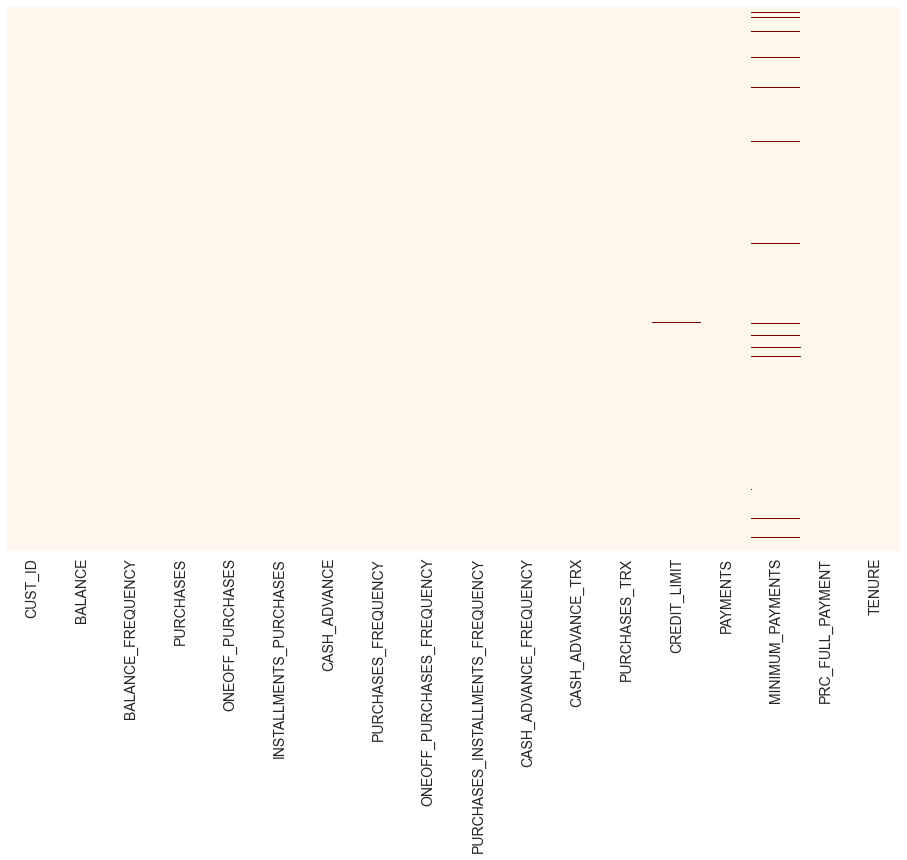

In [152]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="OrRd");


In [153]:
df.isnull().sum().to_frame()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


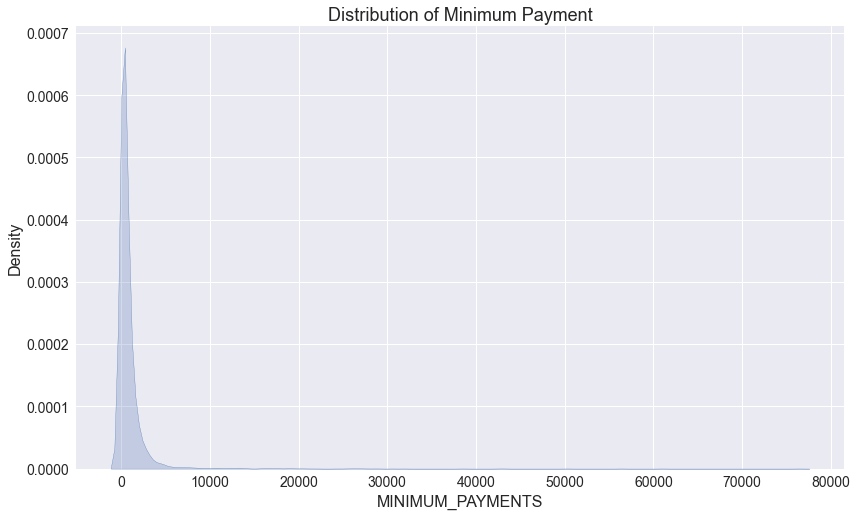

In [154]:
sns.displot(df['MINIMUM_PAYMENTS'],kind="kde", fill = True,height=7, aspect=12/7)
plt.title('Distribution of Minimum Payment')
plt.show()

The data is a little skewed, I will use to mediumn to fill the null values.

In [155]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)


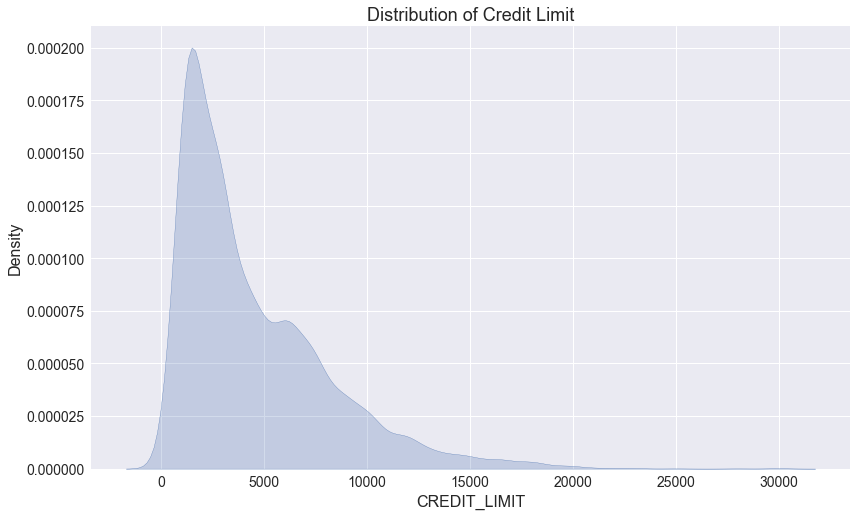

In [156]:
sns.displot(df['CREDIT_LIMIT'],kind="kde", fill = True,height=7, aspect=12/7)
plt.title('Distribution of Credit Limit')
plt.show()

The distribution is a little right skewed, so use the median again.

In [157]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace = True)

In [158]:
# Make sure no more null values
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Drop Redundant Rows & Columns

In [159]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

In [160]:
# Drop the customer id
df.drop('CUST_ID', axis=1, inplace=True)

In [161]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [163]:
len(df.columns)

17

## Distribition of All Features

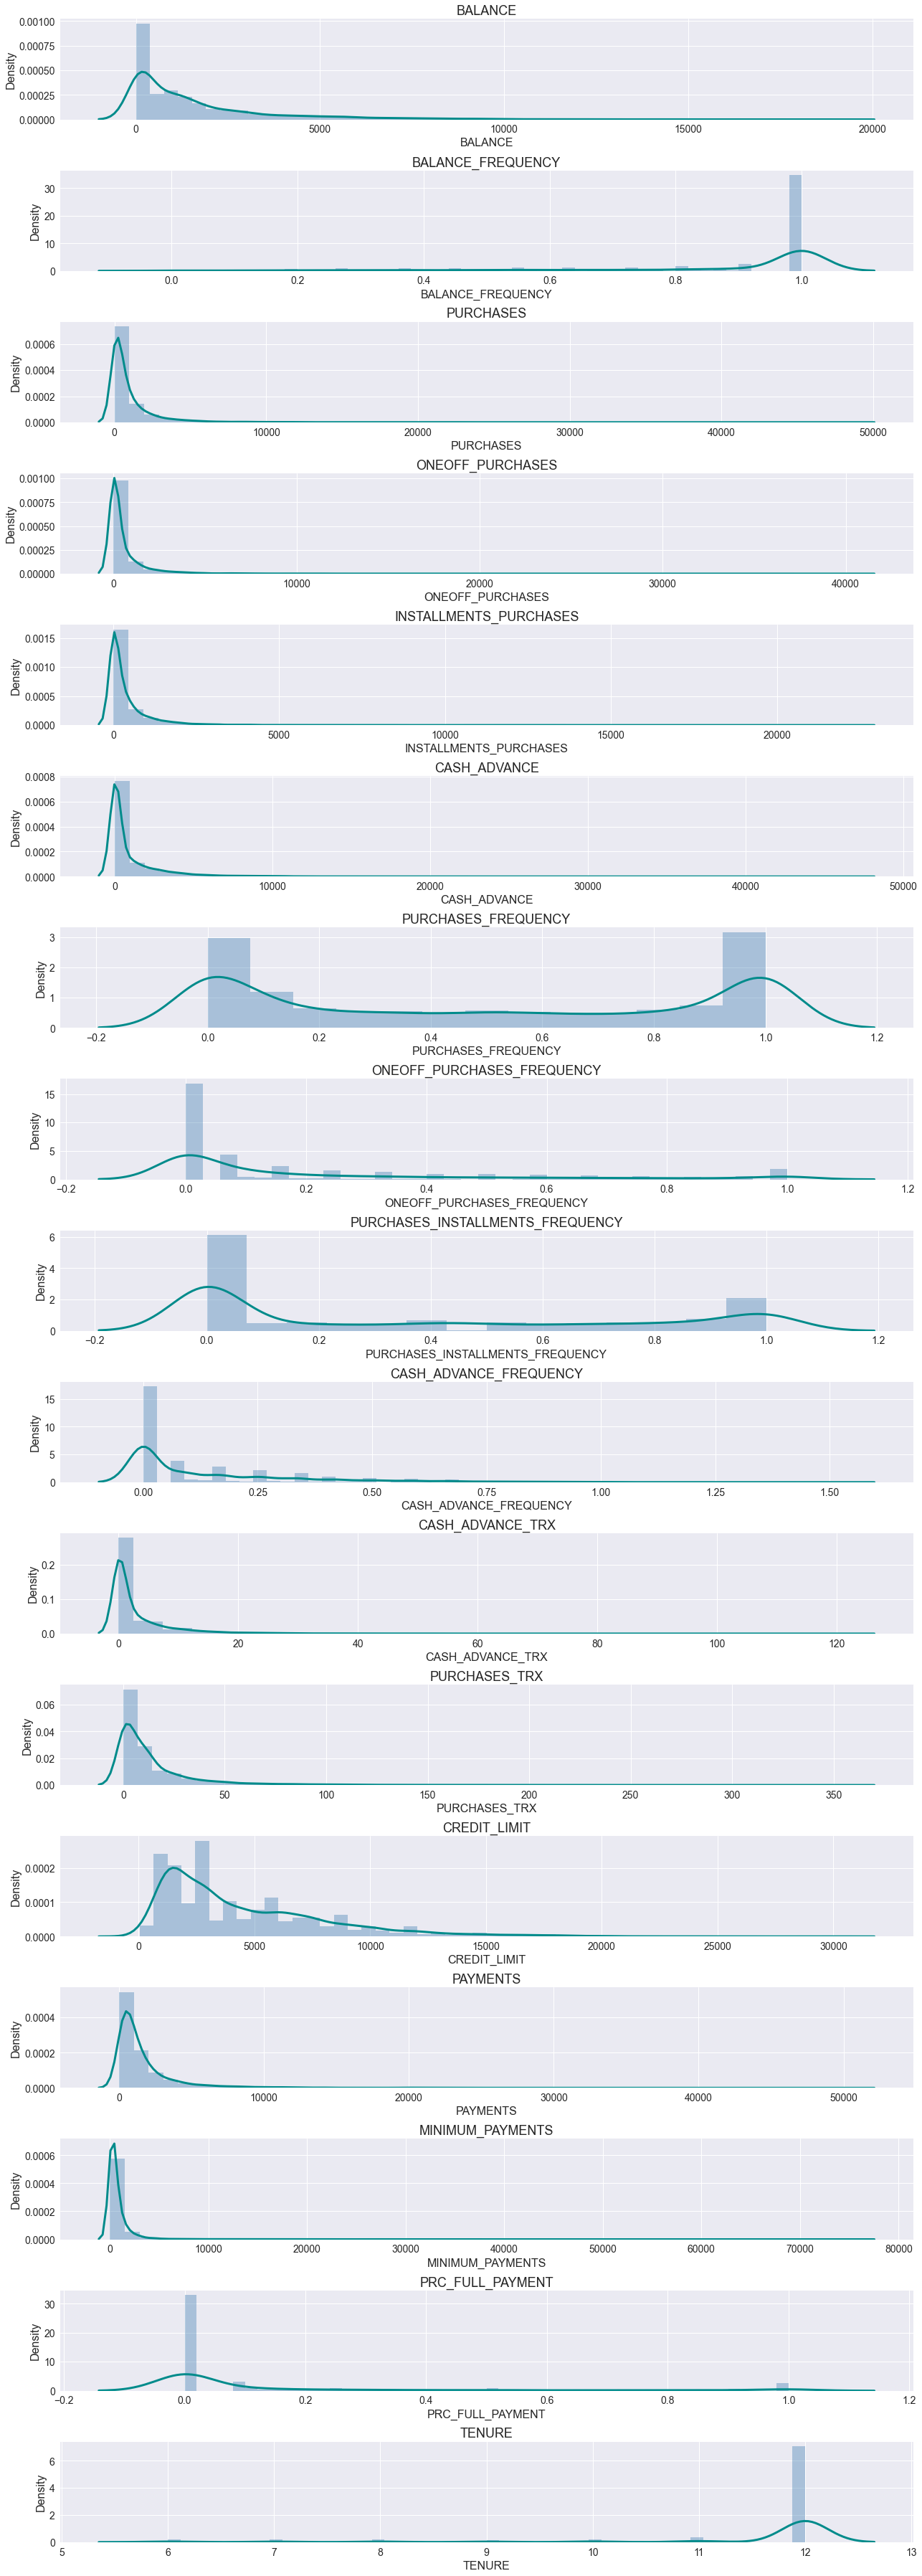

In [165]:
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' 
# majority of the users don't do one off puchases or installment purchases frequently 


plt.figure(figsize=(18,50))

for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "darkcyan", "lw": 3, "label": "KDE"}, hist_kws={"color": "steelblue"})
    plt.title(df.columns[i])

plt.tight_layout();

## Correlations

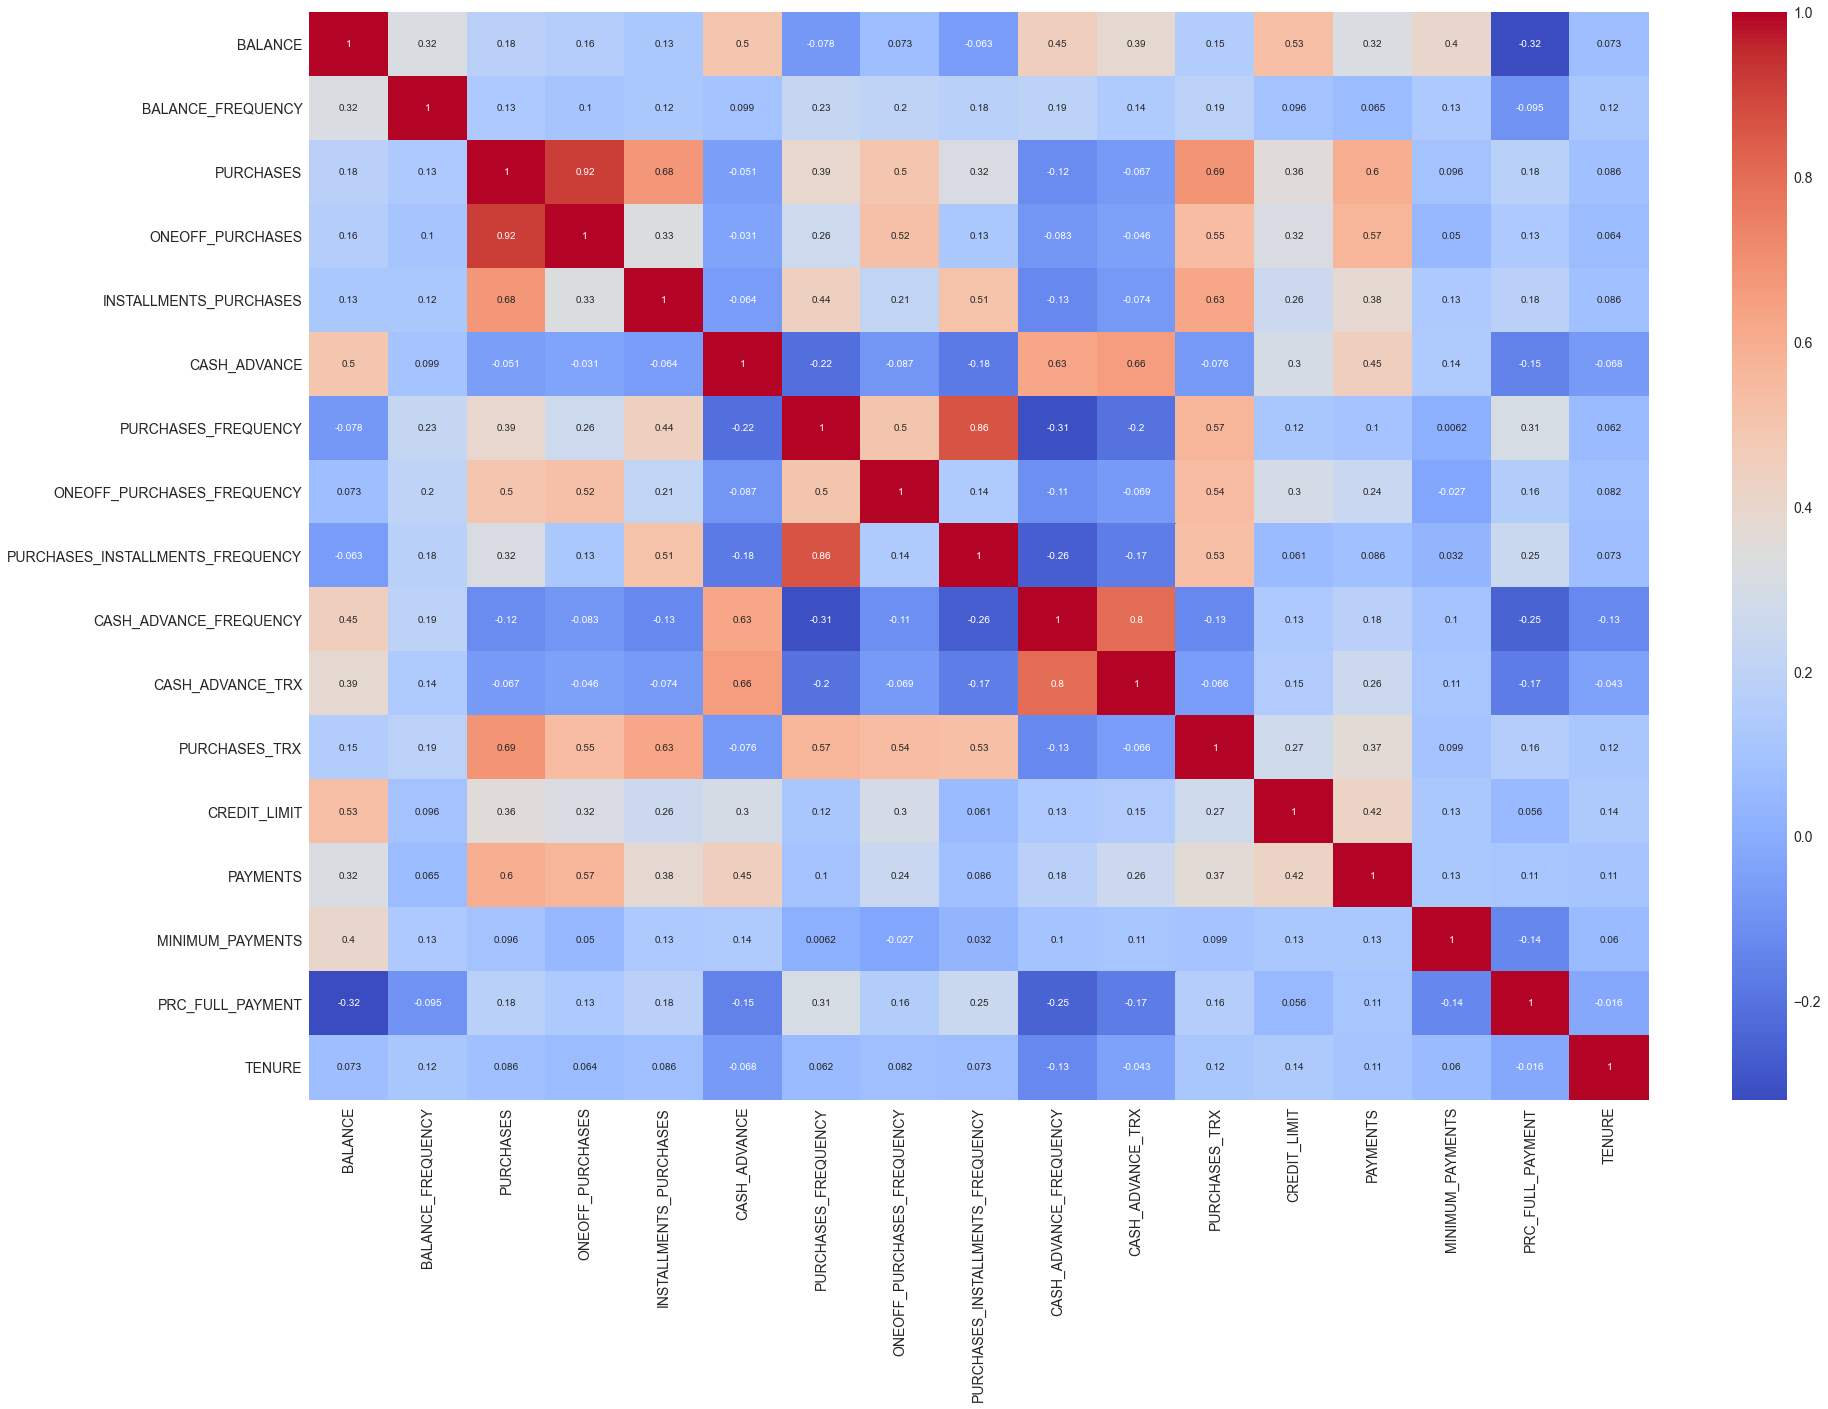

In [106]:
# Purchase and oneoff purchase have a strong postive correlation of 0.92
# Purchase frequency and Purchase installment frequency have a strong positive correlation of 0.86
# Percentage full payment and balance have a moderate negative correlation.
corr = df.corr()
f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corr, annot=True,cmap = 'coolwarm');

 # 4 .Clustering by K-Means

In [118]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, ClusteringScoreVisualizer

In [112]:
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [113]:
df_scaled.shape

(8950, 17)

In [124]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

## Choose the Optimal Number of Cluster by Elbow Method

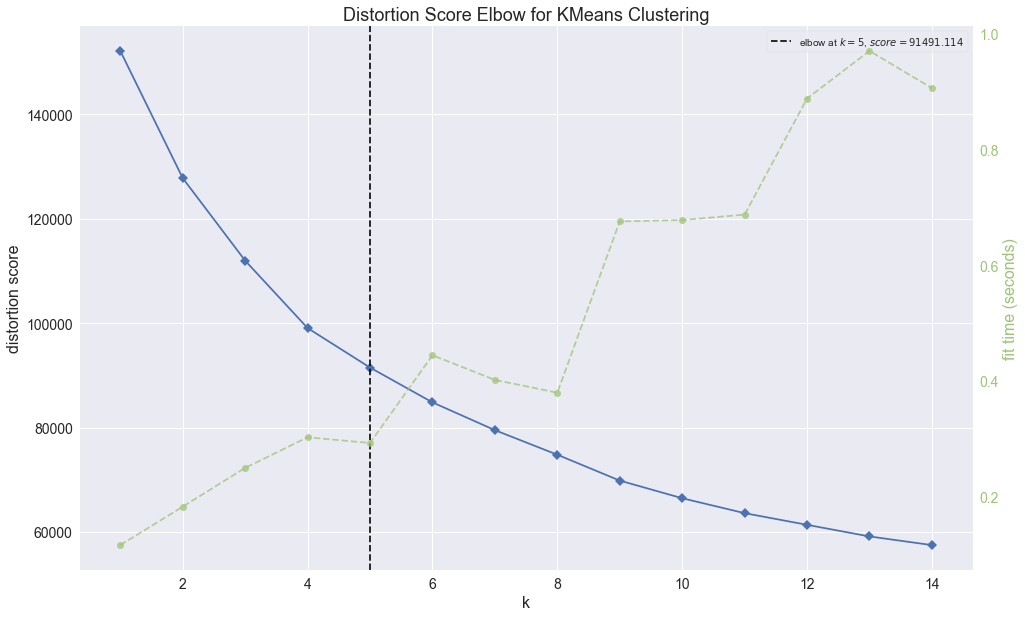

In [144]:
kmeans = KMeans(n_clusters=5)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 15))
vis_elbow.fit(df_scaled)
vis_elbow.poof();

# From this we can observe that, 5th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

## Fit the K-Means Modle with Cluster K = 7

In [131]:
kmeans = KMeans(7)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [132]:
#the shape our centroids
kmeans.cluster_centers_.shape

(7, 17)

In [62]:
# Centroids for each cluster
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.338684,0.355059,0.033452,-0.088063,0.240708,-0.369321,0.980384,0.202081,0.898231,-0.472037,-0.360518,0.233447,-0.143987,-0.179214,-0.084182,0.333594,0.272099
1,0.014242,0.404407,-0.346927,-0.227074,-0.403015,-0.102578,-0.834821,-0.364586,-0.761446,0.088700,-0.039416,-0.472261,-0.302544,-0.248110,-0.004070,-0.455816,0.271914
2,1.650453,0.393059,-0.214516,-0.153205,-0.225831,1.968222,-0.457360,-0.180823,-0.413014,1.897407,1.897747,-0.257925,1.002425,0.800373,0.555088,-0.391885,0.077272
3,-0.701505,-2.134745,-0.305881,-0.230444,-0.299775,-0.323911,-0.537481,-0.436944,-0.427111,-0.523006,-0.377522,-0.414469,-0.174509,-0.200131,-0.257411,0.288850,0.201493
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,0.528253,0.454536,1.801634,1.547155,1.417474,-0.239308,1.152942,1.793681,0.969323,-0.351971,-0.262983,2.108696,1.119728,0.974553,0.199576,0.467137,0.310091
6,-0.341141,-0.333100,-0.280989,-0.207459,-0.282905,0.060232,-0.171997,-0.271368,-0.207953,0.291927,-0.007982,-0.379541,-0.560480,-0.389957,-0.207857,0.021533,-3.178761


In [63]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

# Cluster 2: They use credit card as a loan (most lucrative sector):
#            high balance ($5000) and cash advance (~$5000),
#            low purchase frequency,
#            high cash advance frequency (0.5),
#            high cash advance transactions (16),
#            and low percentage of full payment (3%)


# Cluster 3: Those are customers who pay least amount of intrerest charges
#            and careful with their money,
#            Cluster with lowest balance ($104) and cash advance ($303),
#            Percentage of full payment = 23%


# Cluster 4: They have highest balance,
#            highest credit limit $16K and highest percentage of full payment (strongest financial condition),
#            target for increase credit limit and increase spending habits

# Cluster 6: These are customers with low tenure (7 years),
#            low balance. 
#            (Bank may provide products like cash rewards to strong the relationship) 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,859.532862,0.961381,1074.676262,446.271052,628.737161,204.388277,0.883826,0.262742,0.721417,0.040685,0.788554,20.512449,3970.567623,1214.335651,668.023653,0.251285,11.881457
1,1594.117809,0.973071,261.989942,215.541803,46.626281,763.760380,0.155296,0.093694,0.061819,0.152894,2.979842,2.971202,3393.670506,1014.889046,854.722476,0.020396,11.881210
2,4999.753549,0.970383,544.888049,338.148302,206.851841,5106.325337,0.306790,0.148515,0.200295,0.514835,16.199559,8.298787,8141.680866,4050.144185,2157.814580,0.039095,11.620728
3,104.352190,0.371569,349.684812,209.948262,139.984503,299.614422,0.274633,0.072109,0.194692,0.030485,0.672515,4.407686,3859.514991,1153.785644,264.320540,0.238198,11.786967
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,2663.989431,0.984946,4852.423357,3160.397997,1692.871622,477.030565,0.953082,0.737547,0.749671,0.064711,1.454161,67.124118,8568.476728,4554.378722,1329.310948,0.290344,11.932299
6,854.418008,0.798362,402.868166,248.098605,155.239781,1105.181375,0.421320,0.121503,0.281791,0.193562,3.194357,5.275862,2455.195062,604.255929,379.804248,0.160013,7.263323


In [64]:
# Labels associated to each data point / each customer
labels.shape 

(8950,)

In [65]:
labels.max()

6

In [66]:
labels.min()

0

In [133]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans


array([2, 6, 0, ..., 5, 5, 5], dtype=int32)

In [134]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


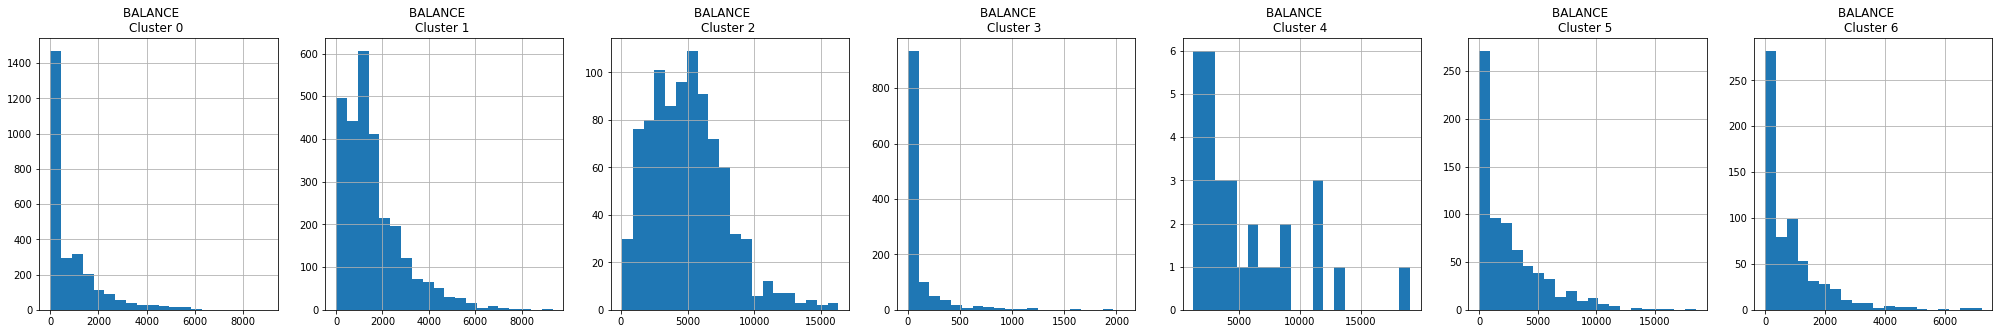

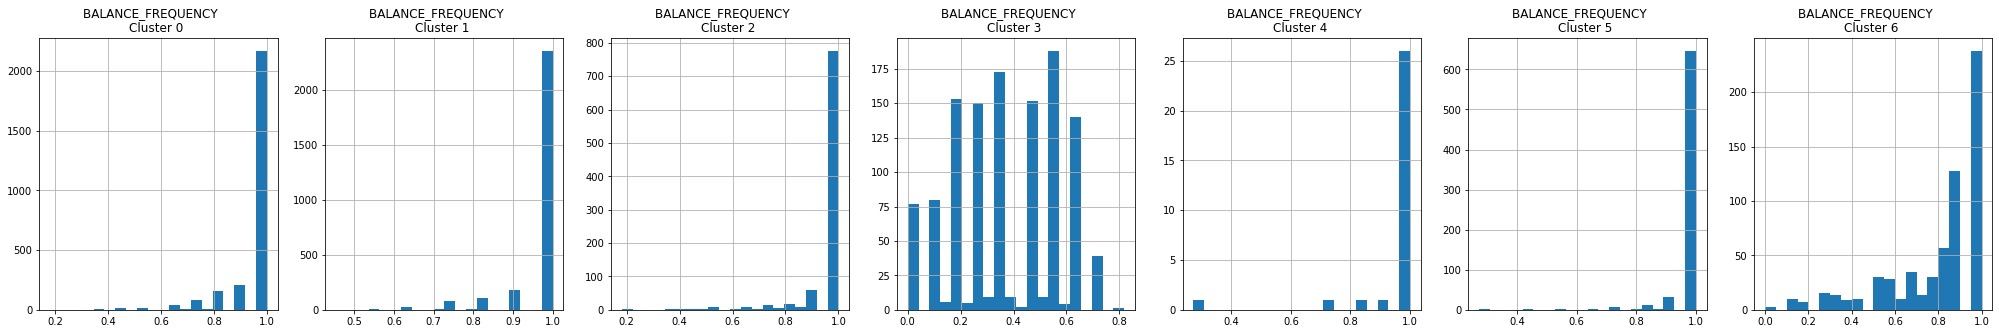

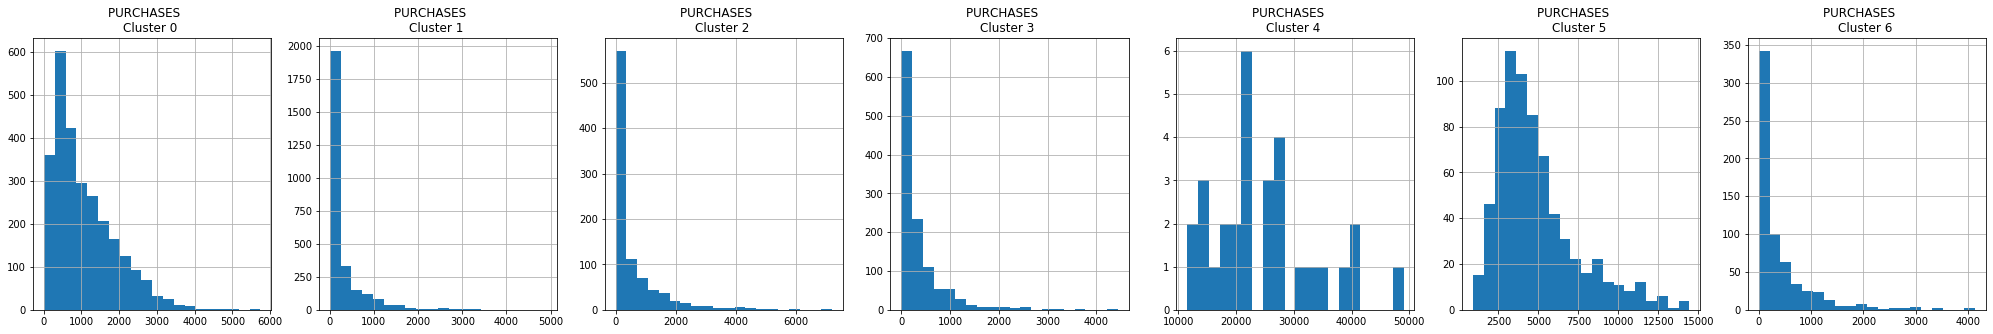

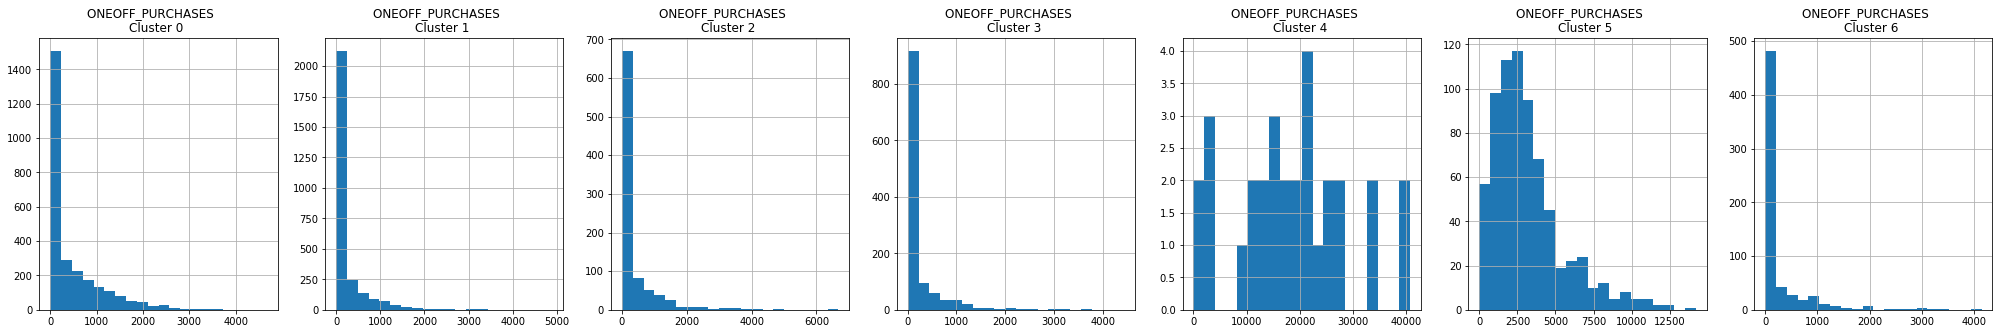

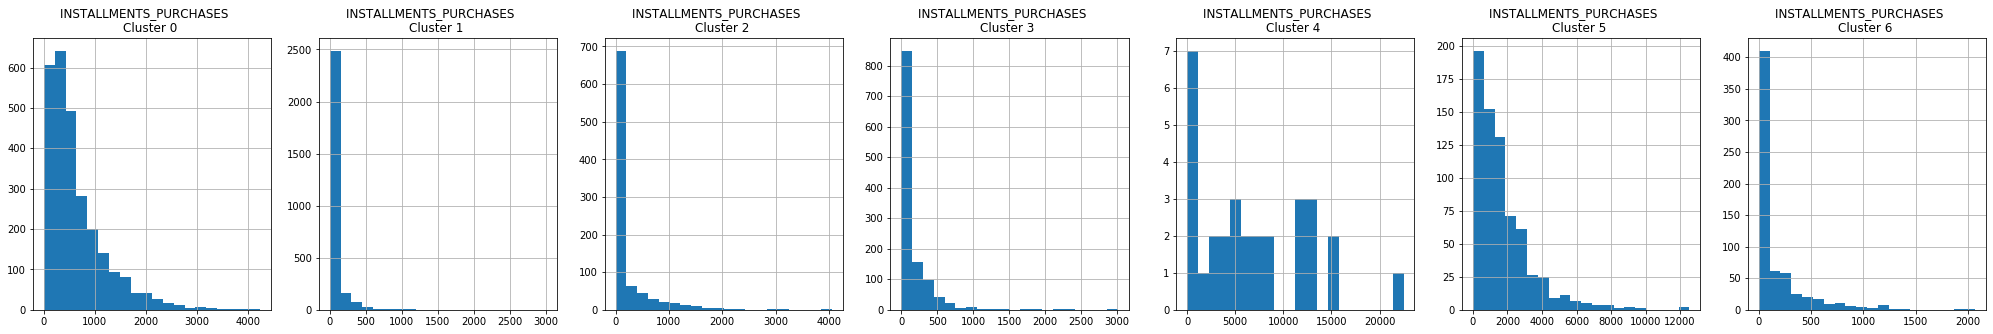

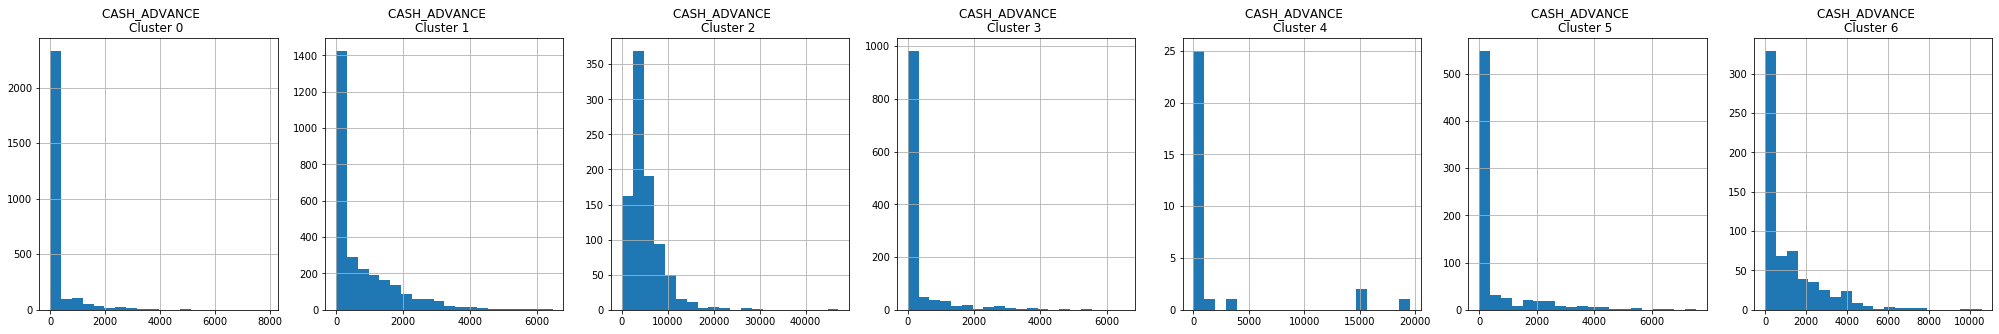

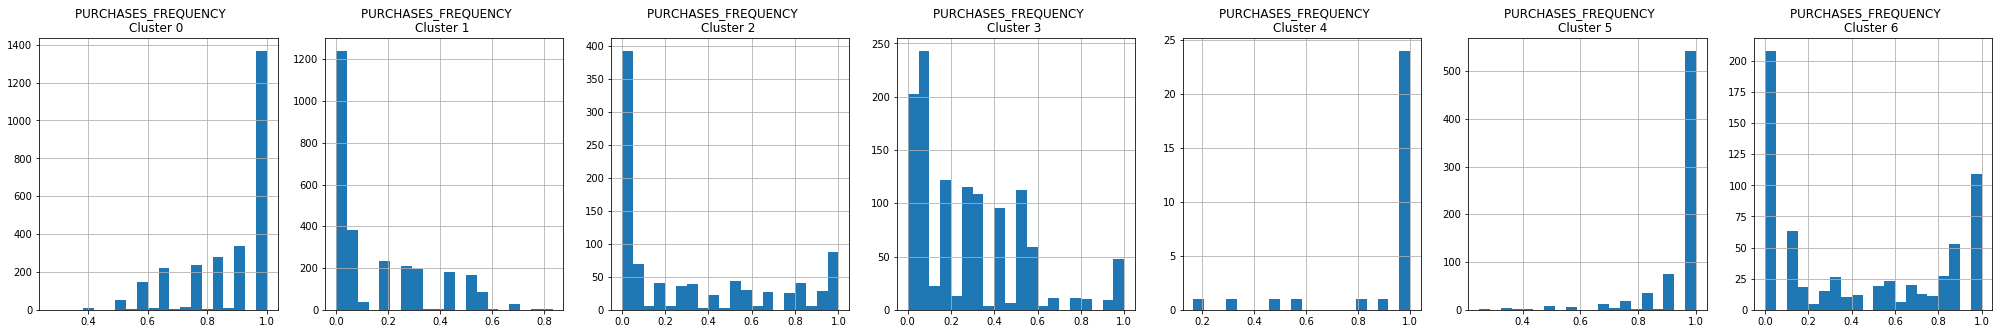

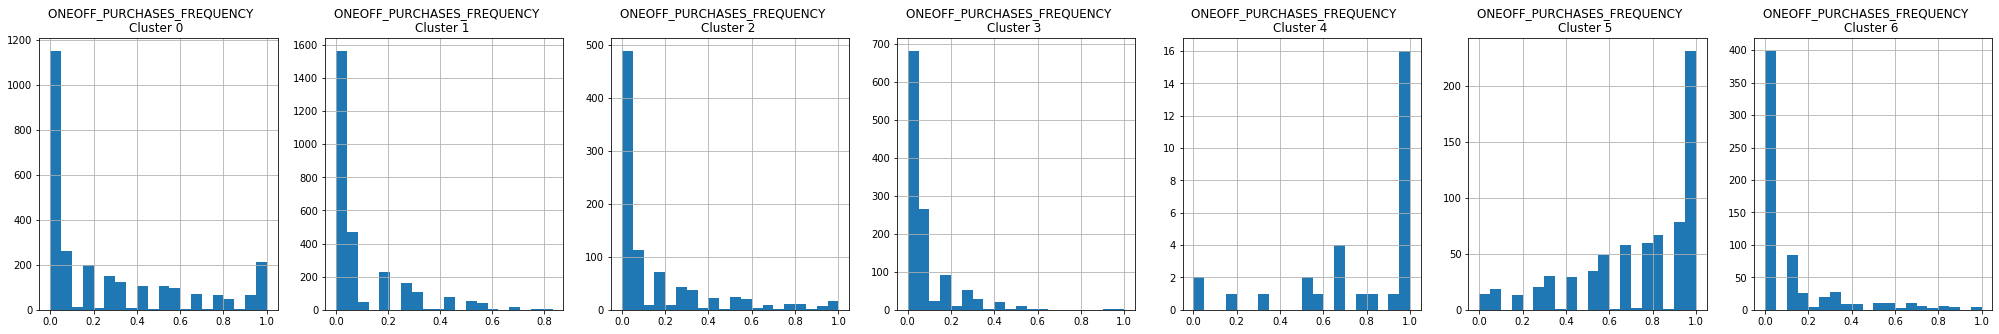

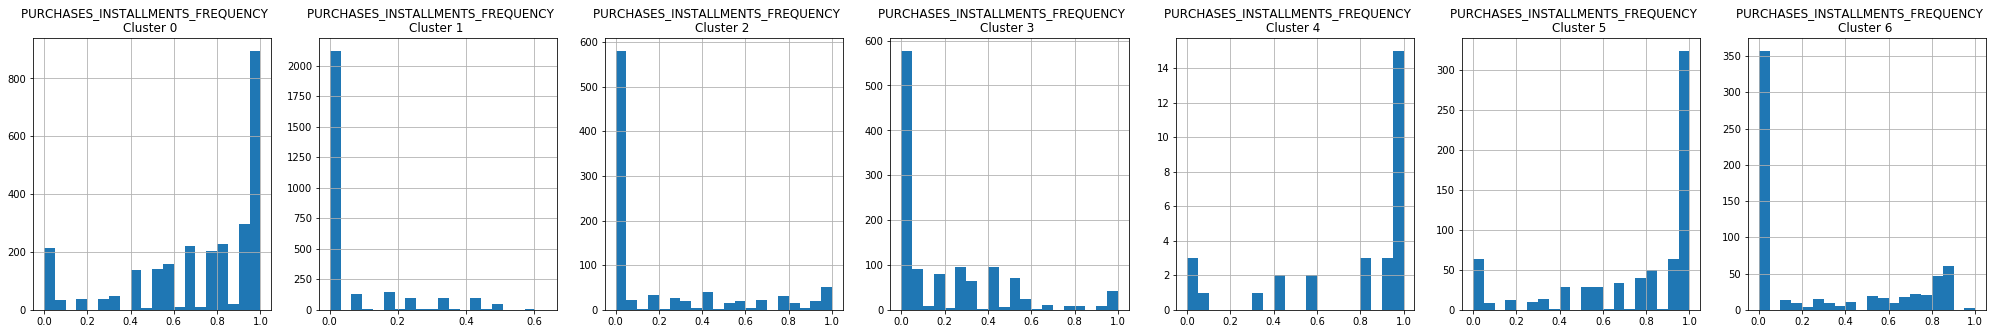

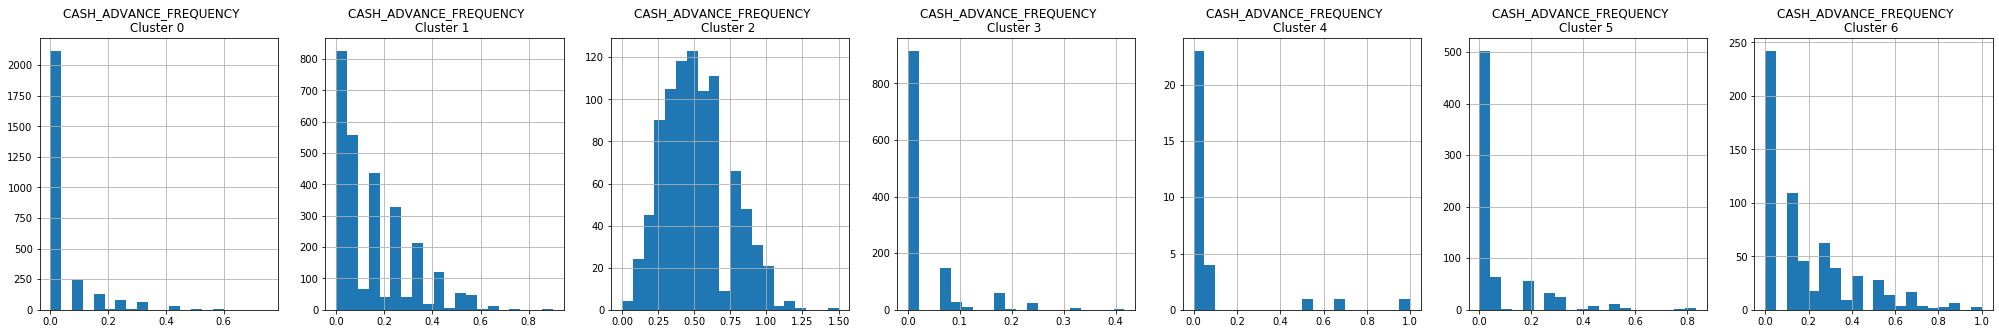

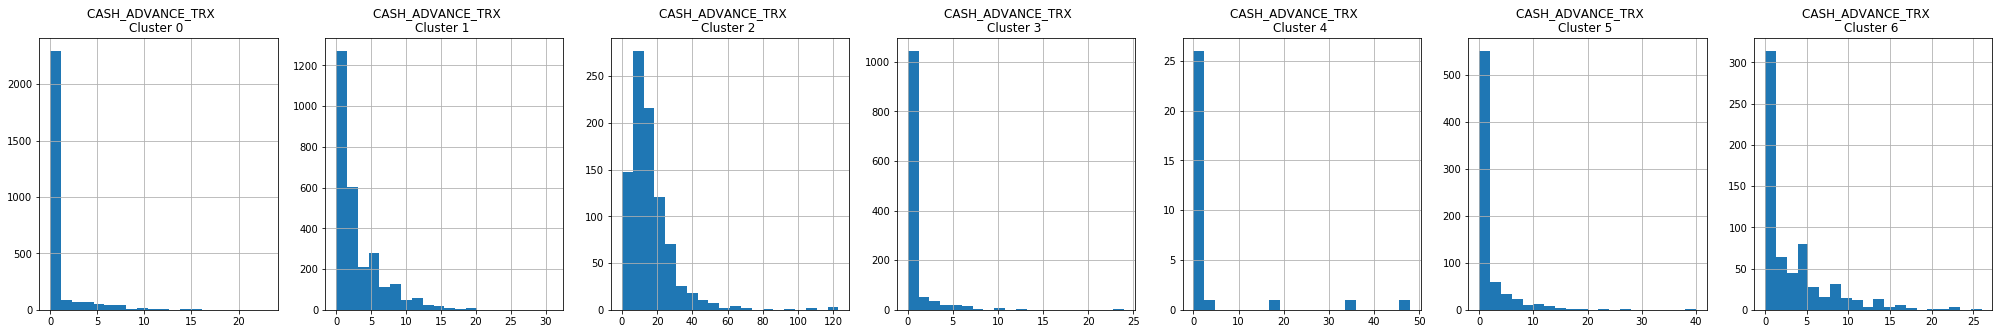

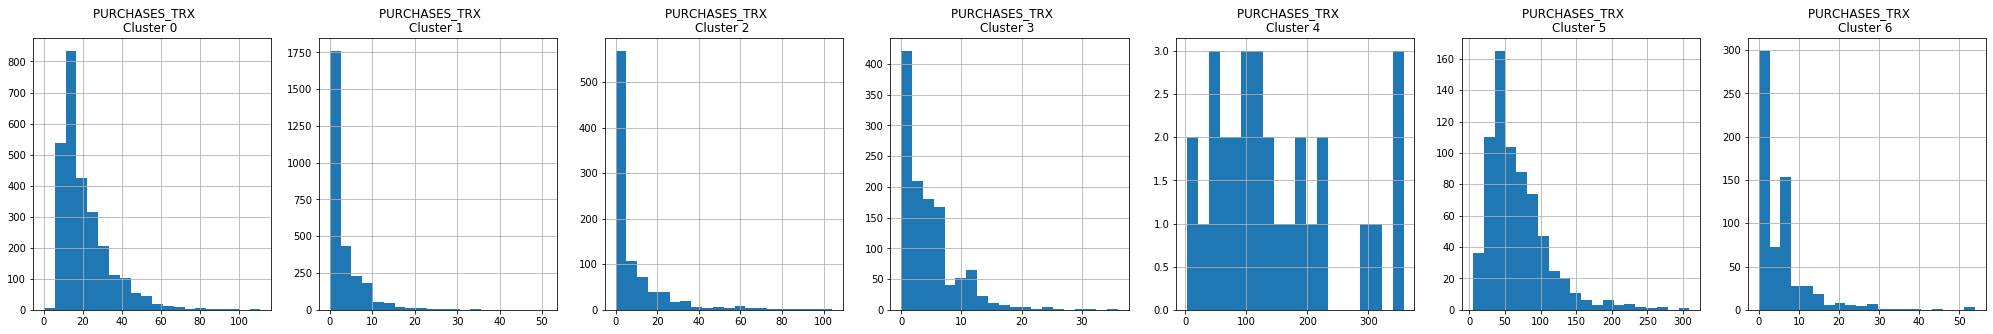

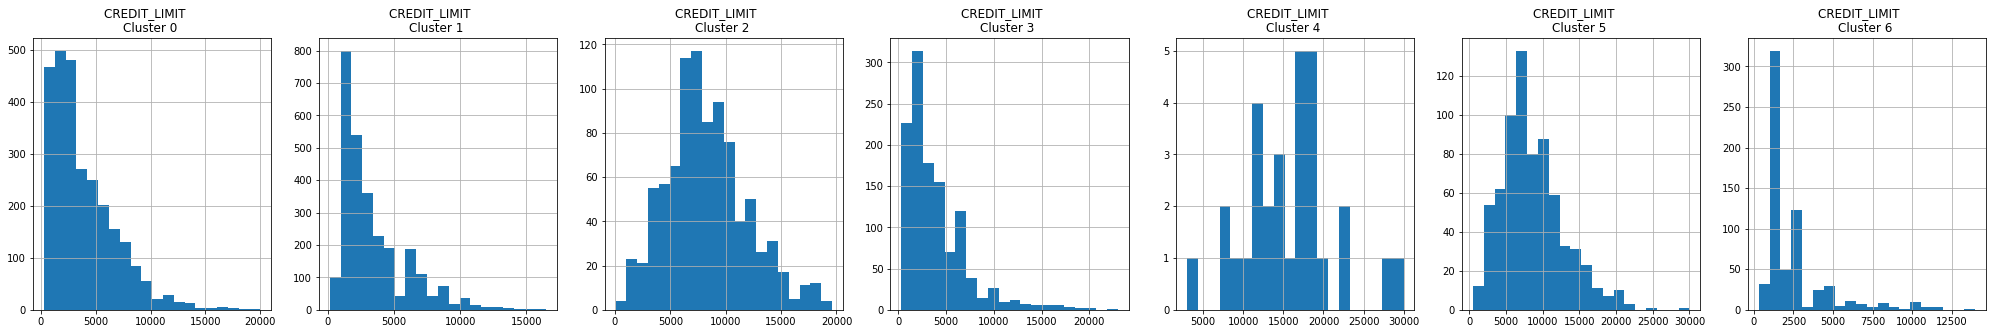

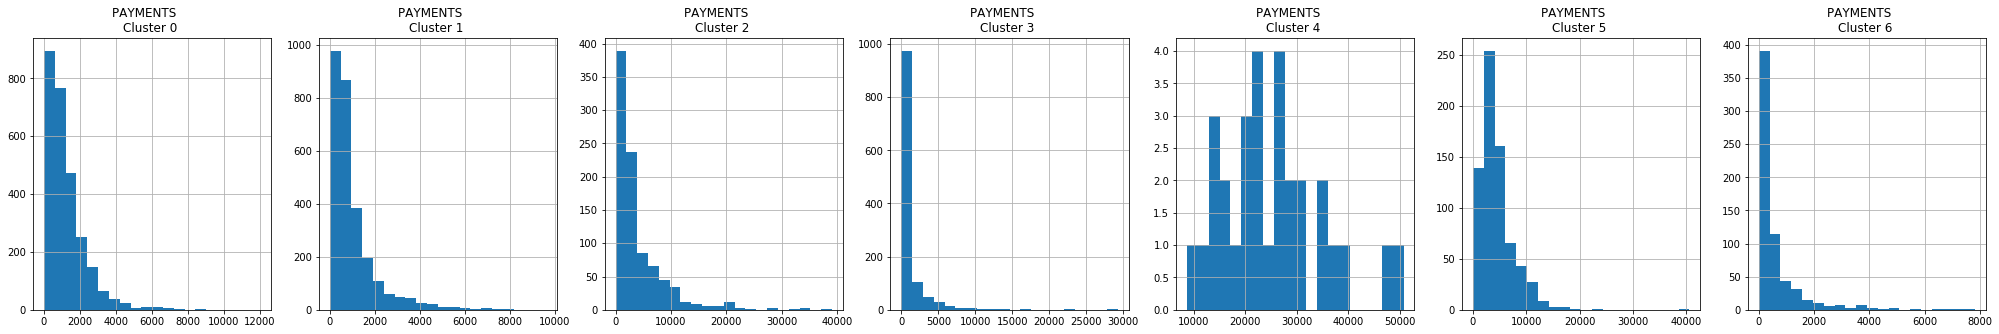

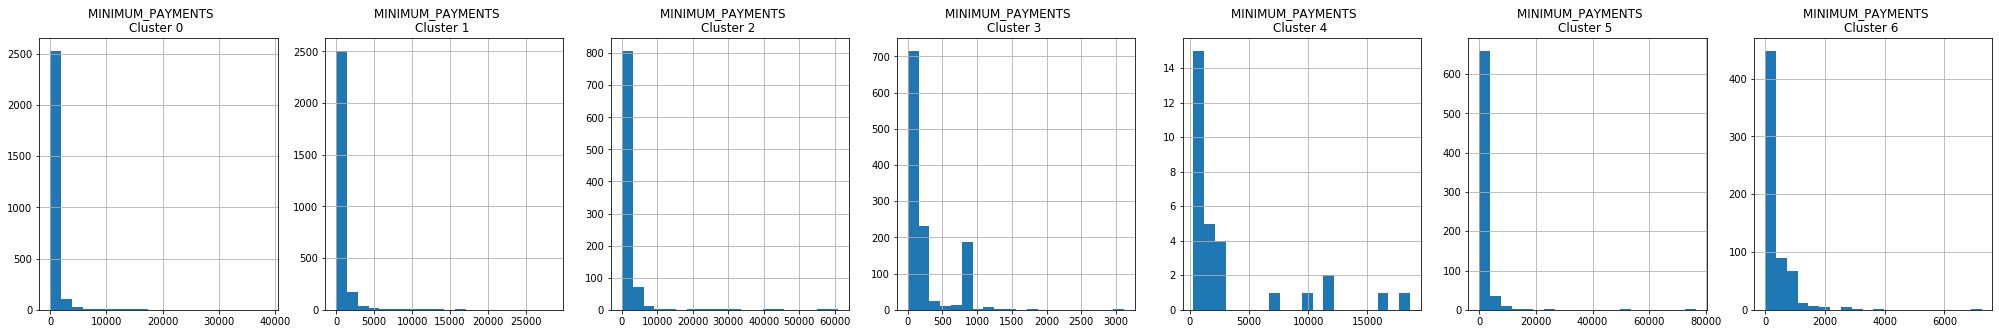

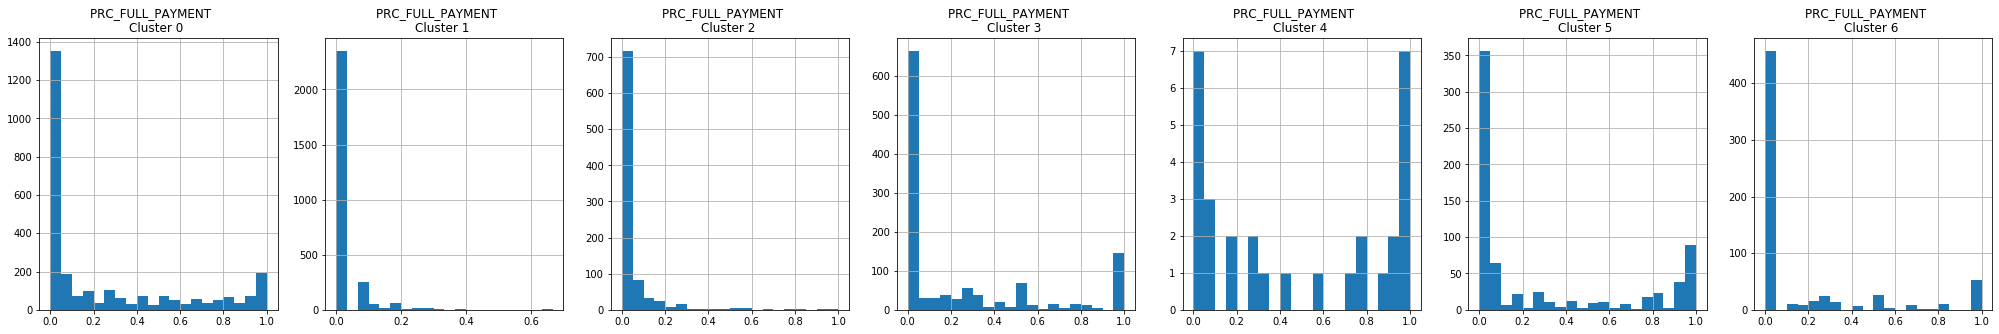

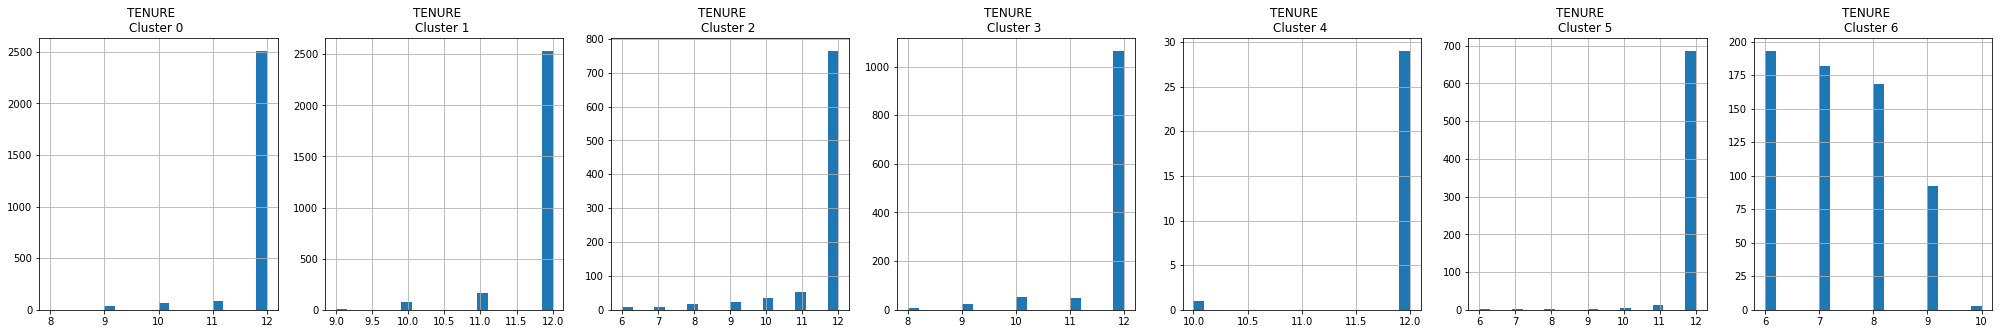

In [71]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# Cluster 2: They use credit card as a loan (most lucrative sector): 
# highest balance ($5000) and cash advance (~$5000),
# low purchase frequency, high cash advance frequency (0.5),
# high cash advance transactions (16) and low percentage of full payment (3%)


# 5.  Apply Principal Component Analysis and Visualize the Clusters

In [135]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.6836503 , -1.07224303],
       [-1.13408584,  2.50914582],
       [ 0.96940446, -0.38356603],
       ...,
       [-0.92898735, -1.80804917],
       [-2.33785045, -0.65361617],
       [-0.55802486, -0.40064462]])

In [136]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.683650,-1.072243
1,-1.134086,2.509146
2,0.969404,-0.383566
3,-0.888221,0.004647
4,-1.600022,-0.683796


In [137]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.683650,-1.072243,4
1,-1.134086,2.509146,6
2,0.969404,-0.383566,2
3,-0.888221,0.004647,4
4,-1.600022,-0.683796,4


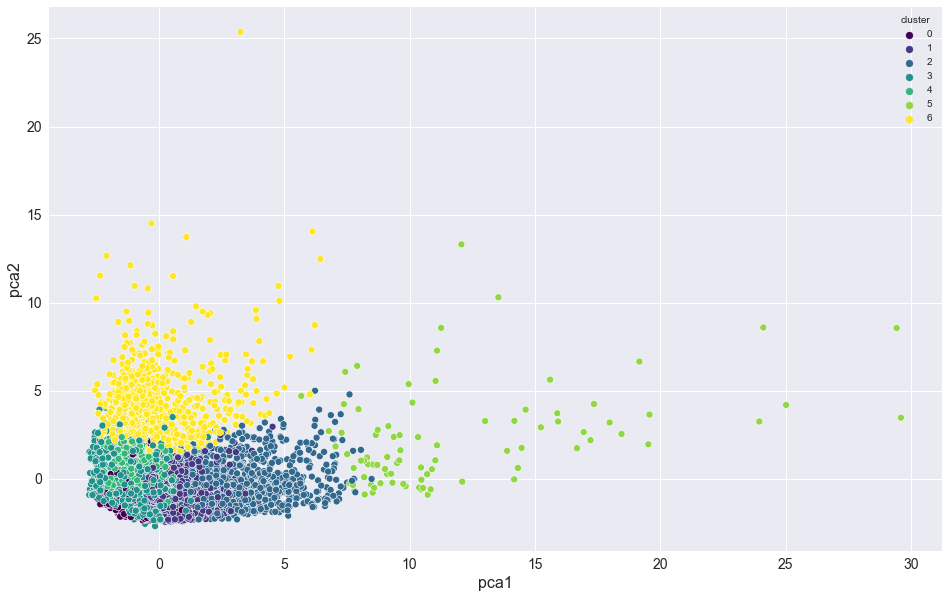

In [146]:
sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df,palette = 'viridis')
plt.show()